A notebook that explains the idea behind waiting time and adding compound interest to a vehicle's waiting time. We start off by only considering the waiting time of a single vehicle, and then extend the idea to multiple vehicles.

Let's start off with the simple example where a vehicle's waiting time increases as time passes (with no interest).

$$
\begin{aligned}
T_0 = 0 \\
T_1 = 1 \\
T_2 = 2 \\
T_3 = 3 \\
T_{10} = 10
\end{aligned}
$$

In [29]:
waiting_time = 0 

for t in range(11):
    waiting_time = t
    print(f'waiting time @ T{t}: {waiting_time}')

waiting time @ T0: 0
waiting time @ T1: 1
waiting time @ T2: 2
waiting time @ T3: 3
waiting time @ T4: 4
waiting time @ T5: 5
waiting time @ T6: 6
waiting time @ T7: 7
waiting time @ T8: 8
waiting time @ T9: 9
waiting time @ T10: 10


Another way to express the waiting time is

$$
\begin{aligned}
T_0 = 0 \\
T_1 = T_0 +1 \\
T_2 = T_1 +1 \\
T_3 = T_2 +1 \\
T_{10} = T_9 +1
\end{aligned}
$$

In [30]:
waiting_time = 0
for t in range(11):
    print(f'waiting time @ T{t}: {waiting_time}')
    waiting_time += 1

waiting time @ T0: 0
waiting time @ T1: 1
waiting time @ T2: 2
waiting time @ T3: 3
waiting time @ T4: 4
waiting time @ T5: 5
waiting time @ T6: 6
waiting time @ T7: 7
waiting time @ T8: 8
waiting time @ T9: 9
waiting time @ T10: 10


Matheamatically, we can express this as

$$
\begin{aligned}
T_n = T_{n-1} + 1
\end{aligned}
$$




Next we are going to add some interest to the waiting time:
$$
\begin{aligned}
T_0 &= 0 \\
T_1 &= T_0(1 +r) + 1\\
T_2 &= T_1(1 +r) + 1\\
T_3 &= T_2(1 +r) + 1\\
T_{10} &= T_9(1 +r) + 1
\end{aligned}

$$

where $r$ is the interest rate. In the example below we are going to use $r = 0.1$. Note that we still add 1 to the waiting time. This is because the vehicle is waiting for 1 time step. Otherwise the vehicle would not be waiting at all, and we would only adding interest to the initial waiting time. The waiting time contribution at each time step can be set to the step size of the simulation. For example, if the simulation step size is 1 second, then the waiting time contribution is 1 second. If the simulation step size is 1 minute, then the waiting time contribution is 1 minute.

In [31]:
waiting_time = 0
interest = 0.1

for t in range(11):
    # print waiting time rounded to 2 decimal places
    print(f'waiting time @ T{t}: {waiting_time:.2f}')
    waiting_time = waiting_time * (1 + interest) + 1

waiting time @ T0: 0.00
waiting time @ T1: 1.00
waiting time @ T2: 2.10
waiting time @ T3: 3.31
waiting time @ T4: 4.64
waiting time @ T5: 6.11
waiting time @ T6: 7.72
waiting time @ T7: 9.49
waiting time @ T8: 11.44
waiting time @ T9: 13.58
waiting time @ T10: 15.94


In the above example, a much higher waiting time is accumulated compared to the first example without interest. This is because the interest is added to the waiting time at each time step.

Next we are going to formulate the waiting time as a function of time. This is done by using the equation

$$
T_n = T_{n-1}(1 +r) + 1
$$

We can use the fact that $T_{n-1} = T_{n-2}(1+r) + 1$ to obtain the following recursive relationship

The above equation can be rewritten as

$$
\begin{aligned}
T_n &= T_{n-2}(1+r)^2 + (1+r) + 1 \\
T_n &= T_{n-3}(1+r)^3 + (1+r)^2 + (1+r) + 1 \\
T_n &= T_{n-4}(1+r)^4 + (1+r)^3 + (1+r)^2 + (1+r) + 1
\end{aligned}
$$


Continuing this process we can obtain the following equation

$$
T_n = T_0(1+r)^n + \sum_{i=0}^{n-1}(1+r)^i,
$$
    
where $T_0$ is the initial waiting time. The above equation can be rewritten as

$$
T_n = T_0(1+r)^n + \frac{(1+r)^n - 1}{r}
$$



In [13]:
def compound_interest(initial_amount, interest_rate, time):
    """Calculate compound interest for a given initial amount, interest rate and time."""
    return initial_amount * (1 + interest_rate) ** time + sum((1 + interest_rate) ** t  for t in range(time))

In [16]:
compound_interest(0, 0.1, 10, 1)

15.937424601000005

In the previous example the contribution was $1$ for each time step. This can be generalized to any value $c$.

$$
\begin{aligned}
T_n &= T_{n-1}(1+r) + c \\
T_n &= T_{n-2}(1+r)^2 + (1+r)c + c \\
T_n &= T_{n-3}(1+r)^3 + (1+r)^2c + (1+r)c + c
\end{aligned}
$$

If we continue this process we can obtain the following equation

$$
T_n = T_0(1+r)^n + \sum_{i=0}^{n-1}(1+r)^i c
$$

The above equation can be rewritten as

$$
T_n = T_0(1+r)^n + \frac{(1+r)^n - 1}{r}c
$$

Let's update the function to include the contribution $c$.

In [19]:
def compound_interest_v2(T0, r, n, c):
    return T0*(1+r)**n + sum([(1+r)**i*c for i in range(n)])


In [36]:
def compound_interest_v3(T0, r, n, c):
    return T0*(1+r)**n + ((1 +r)**n -1)*c/r

In [49]:
def compound_interest_v4(r, n, c):
    return  c* ((1 - (1/(1+r)**n) )/ r)

In [50]:
compound_interest_v2(0, 0.1, 10, 1)

15.937424601000005

In [51]:
compound_interest_v3(0, 0.1, 10, 1)

15.937424601000023

In [54]:
compound_interest_v4(0.1, 10, 1)

6.144567105704685

Let's plot the waiting time for c=1 over 100 time steps with an interest rate of 0.001, 0,01, 0,1.

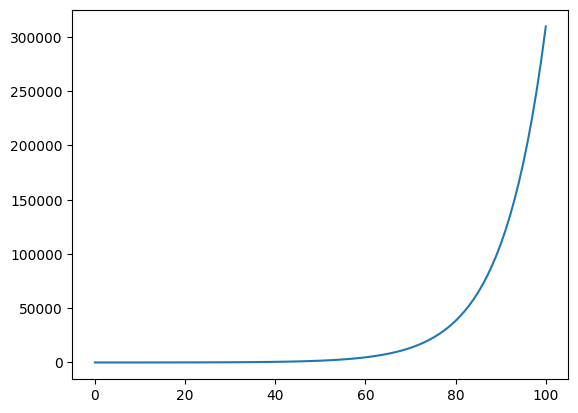

In [28]:
import matplotlib.pyplot as plt

for r in [0.11]:
    waiting_times = []
    for t in range(101):
        waiting_times.append(compound_interest_v2(0, r, t, 1))
    plt.plot(waiting_times, label=f'r={r}')

Some notes on the implementation in Sumogym and for the GA paper. The function defintion of the halting time reward function in SumoGym look like:

```python
class RewardHaltTime(RewardBase):
    def __init__(self,
                 halt_speed=0.1,
                 upscale_rate=0.0,
                 on_arrival=False,
                 delta=False,
                 clip=None,
                 scale=None):
```

If `delta` is set to `True` then the reward is calculated as the difference between the current waiting time and the previous waiting time. This is done by subtracting the waiting time from the previous time step from the current waiting time. In the case of the GA paper this is set to 'False', meaning that the sum of all vehicles' compound interest waiting time is used as the reward at each time step.

(The `upscale_rate` is the interest rate)

So to put the above equation into perspective, we need to calculate the waiting time for each vehicle at each time step, and then sum them up. (This is the reward at each time step)

To calculate the return we need to sum up the rewards over all time steps. (This is the return)

The return will look something like:

$$
\begin{aligned}
G_T = \sum_{j=0}^{T} \sum_{v=0}^V \left[T_0(1+r)^j + \sum_{i=0}^{j-1}(1+r)^i c\right]
\end{aligned}
$$

The above equation for the return does not feel completely correct to me. I think the return should be the sum of all vehicles' compound interest waiting time at the end of the episode. So the return should be

$$
\begin{aligned}
G_T = \sum_{v=0}^V \left[T_0(1+r)^T + \sum_{i=0}^{T-1}(1+r)^i c\right]
\end{aligned}
$$

And the reward should rather be the difference between the current waiting time and the previous waiting time.

Therefor the reward should be

$$
\begin{aligned}
R_t = W_t - W_{t-1}
\end{aligned}
$$

where $W_t$ is the waiting time at time step $t$ (with interest).